# Regression with Deep Neural Network (DNN)


In a regression problem, the aim is to predict the output of a continuous value, like a energy consumption, a temperature value or a probability.

This file demonstrates how to build models to predict the energy efficiency of the MAU system. To do this, you will provide the models with a description of many MAUs from that a certain period. This description includes attributes like temperature, humidity, airflow, and enthalpy.

In [5]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [7]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


## Load all MAU entrance data (340 counts)

In [9]:
# Load entrance data
data_entrance = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/random_noise_data_entrance_340.csv', encoding='unicode_escape')
#data_entrance=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\random_noise_data_entrance_340.csv', encoding='unicode_escape')
#data_entrance=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\random_noise_data_entrance_340.csv', encoding='unicode_escape')
data_entrance

,ï»¿Date,Temperature (Â°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,22-Feb-24,73.990,31.99,6.739634,38.084616,5.703496
1,22-Feb-24,87.400,20.51,6.478677,45.612924,5.626363
2,22-Feb-24,88.410,20.05,6.614761,46.233882,5.757059
3,22-Feb-24,87.370,20.35,6.498739,45.412801,5.552050
4,22-Feb-24,87.330,20.63,6.505203,45.513075,5.695444
...,...,...,...,...,...,...
335,4-Apr-24,90.770,7.00,2.320417,38.438527,2.085040
336,4-Apr-24,90.734,7.57,2.685156,38.786357,2.213950
337,4-Apr-24,88.988,7.97,2.692662,38.051719,2.368482
338,4-Apr-24,90.194,7.64,2.786365,38.712086,2.349042


## Load all MAU exit data (340 counts)

In [11]:
# Load exit data
data_exit = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/random_noise_data_exit_340.csv', encoding='unicode_escape')
#data_exit=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\random_noise_data_exit_340.csv', encoding='unicode_escape')
#data_exit=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\random_noise_data_exit_340.csv', encoding='unicode_escape')
data_exit

,ï»¿Date,Temperature (Â°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,22-Feb-24,75.038,38.79,8.461013,42.420607,7.130722
1,22-Feb-24,74.984,38.16,8.367809,42.094462,7.088645
2,22-Feb-24,75.092,39.94,8.633728,42.971724,7.405640
3,22-Feb-24,75.020,39.08,8.573215,42.546864,2.256353
4,22-Feb-24,75.038,38.89,8.495630,42.400419,7.146205
...,...,...,...,...,...,...
335,4-Apr-24,75.074,38.43,8.361217,42.219083,7.076425
336,4-Apr-24,75.146,39.14,8.487478,42.653262,7.252031
337,4-Apr-24,75.074,42.52,8.469769,42.468097,7.212769
338,4-Apr-24,75.146,38.07,8.328769,42.158082,6.980890


## Split the data into training and test sets

Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your model.

The line of code "train_dataset = dataset.sample(frac=0.8, random_state=0)" creates a training dataset by randomly selecting 80% of the rows from the dataset, ensuring that the selection is reproducible by setting a random state. The frac=0.8 parameter specifies that 80% of the data should be sampled, and random_state=0 ensures that the random selection of rows is consistent every time the code is run, facilitating reproducible results in experiments or analyses.

The line "test_dataset = dataset.drop(train_dataset.index)" removes all rows from dataset that are already included in train_dataset, effectively creating a test dataset. This is achieved by dropping rows indexed in train_dataset.index from the original dataset. The result is a dataset containing 20% of the original data, not selected for training, used for testing model performance.

### Train datasets for MAU entrance (272 counts)

Drop 'Count' and 'Which MAU' columns.

In [16]:
data_entrance = data_entrance.drop(['ï»¿Date'], axis=1)
train_dataset_entrance = data_entrance.sample(frac=0.8, random_state=0)
test_dataset_entrance = data_entrance.drop(train_dataset_entrance.index)
train_dataset_entrance

# Spliting data into Feature 
#X=data[['Humidity (%)','Airflow (g/m^3)','Enthalpy, h (kJ/kg)','x (g/kg)']]
#y=data['Temperature (°F)']

# Import train_test_split function
#from sklearn.model_selection import train_test_split

# Split dataset into training set and test (validation) set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% training and 20% test

,Temperature (Â°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
225,87.330,20.63,6.618528,45.665051,5.661910
271,86.720,7.95,2.391320,36.279681,2.227304
204,73.990,31.99,6.753991,38.115914,5.658066
274,88.410,20.05,6.582001,46.277658,5.752278
299,88.720,13.32,4.397792,41.572672,3.736026
...,...,...,...,...,...
143,87.760,12.46,3.984378,40.290405,3.480314
180,88.720,13.32,4.393553,41.531900,3.807427
131,90.770,7.00,2.420199,38.353314,2.127184
302,90.734,7.57,2.741618,38.748406,2.348994


### Test datasets for MAU entrance (68 counts)

In [18]:
test_dataset_entrance

,Temperature (Â°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
9,89.650,13.09,4.401632,42.274344,3.860325
25,85.660,14.32,4.370370,39.863345,3.698648
28,78.570,26.62,6.381562,40.238158,3.941589
31,88.988,7.97,2.692270,38.022185,2.276832
32,90.194,7.64,2.736127,38.803568,2.363204
...,...,...,...,...,...
315,89.650,13.09,4.376609,42.282407,3.763491
323,73.990,31.99,6.773940,38.008877,5.750958
325,88.410,20.05,6.670464,46.247404,5.737961
327,87.330,20.63,6.495229,45.571644,5.664049


### Load original entrance data

In [20]:
# Load entrance data
ori_data_entrance = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/AI_model_MAU_Entrance.csv', encoding='unicode_escape')
#ori_data_entrance=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Entrance.csv', encoding='unicode_escape')
#ori_data_entrance=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Entrance.csv', encoding='unicode_escape')
ori_data_entrance

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,73.990,31.99,6.73,38.08,5.68
1,2,2,87.400,20.51,6.51,45.55,5.66
2,3,3,88.410,20.05,6.59,46.29,5.74
3,4,4,87.370,20.35,6.45,45.39,5.60
4,5,5,87.330,20.63,6.51,45.59,5.66
5,6,9,75.540,29.08,6.44,38.33,5.46
6,7,1,80.780,22.35,5.81,40.09,4.98
7,8,1,87.760,12.46,3.97,40.32,3.46
8,9,1,85.660,14.32,4.39,39.87,3.72
9,10,3,89.650,13.09,4.42,42.21,3.86


### Original test datasets for MAU entrance (3 counts)

In [22]:
ori_test_entrance = ori_data_entrance.iloc[[5, 12, 15]]
ori_test_entrance

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,6,9,75.540,29.08,6.44,38.33,5.46
12,13,2,90.770,7.00,2.42,38.36,2.10
15,16,5,90.194,7.64,2.76,38.77,2.32


### Train datasets for MAU exit (272 counts)

In [24]:
data_exit = data_exit.drop(['ï»¿Date'], axis=1)
train_dataset_exit = data_exit.sample(frac=0.8, random_state=0)
test_dataset_exit = data_exit.drop(train_dataset_exit.index)
train_dataset_exit

,Temperature (Â°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
225,75.038,38.89,8.476378,42.396510,7.205999
271,75.182,39.89,8.665360,42.979357,7.455157
204,75.038,38.79,8.446582,42.355040,7.187971
274,75.092,39.94,8.619342,42.970125,7.338046
299,75.110,38.67,8.442880,42.501051,7.175249
...,...,...,...,...,...
143,74.804,38.61,8.352576,42.012780,7.118046
180,75.110,38.67,8.446570,42.555351,7.167860
131,75.074,38.43,8.421875,42.249949,7.108325
302,75.146,39.14,8.512689,42.774177,7.149740


### Test datasets for MAU exit (68 counts)

In [26]:
test_dataset_exit

,Temperature (Â°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
9,75.074,39.34,8.556251,42.768485,7.364775
25,74.894,38.55,8.809186,42.199336,7.506645
28,74.516,38.64,8.158391,41.736814,7.083349
31,75.074,42.52,8.433321,42.531764,7.190104
32,75.146,38.07,8.268372,42.181495,7.027293
...,...,...,...,...,...
315,75.074,39.34,8.617384,42.765265,7.186293
323,75.038,38.79,8.337885,42.368529,7.248409
325,75.092,39.94,8.669885,42.921554,7.434315
327,75.038,38.89,8.463199,42.462564,7.199611


### Load original exit data

In [28]:
# Load exit data
ori_data_exit = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/AI_model_MAU_Exit.csv', encoding='unicode_escape')
#ori_data_exit=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Exit.csv', encoding='unicode_escape')
#ori_data_exit=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Exit.csv', encoding='unicode_escape')
ori_data_exit

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,75.038,38.79,8.40,42.38,7.17
1,2,2,74.984,38.16,8.28,42.05,7.04
2,3,3,75.092,39.94,8.68,42.99,7.40
3,4,4,75.020,39.08,8.48,42.52,2.22
4,5,5,75.038,38.89,8.45,42.45,7.19
5,6,9,75.110,38.80,8.45,42.50,7.19
6,7,1,74.876,38.19,8.26,41.93,7.03
7,8,1,74.804,38.61,8.32,42.04,7.08
8,9,1,74.894,38.55,8.83,42.11,7.59
9,10,3,75.074,39.34,8.56,42.73,7.28


### Original test datasets for MAU exit (3 counts)

In [30]:
ori_test_exit = ori_data_exit.iloc[[5, 12, 15]]
ori_test_exit

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,6,9,75.110,38.80,8.45,42.50,7.19
12,13,2,75.074,38.43,8.36,42.28,7.11
15,16,5,75.146,38.07,8.30,42.19,7.06


### Train and test features, and train and test labels for MAU entrance

In [32]:
train_features_entrance = train_dataset_entrance.copy()
test_features_entrance = test_dataset_entrance.copy()
train_labels_entrance = train_features_entrance.pop('Temperature (Â°F)')
test_labels_entrance = test_features_entrance.pop('Temperature (Â°F)')

In [33]:
# original
ori_test_features_entrance = ori_test_entrance.copy()
ori_test_labels_entrance = ori_test_features_entrance.pop('Temperature (°F)')

In [34]:
train_features_entrance

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
225,20.63,6.618528,45.665051,5.661910
271,7.95,2.391320,36.279681,2.227304
204,31.99,6.753991,38.115914,5.658066
274,20.05,6.582001,46.277658,5.752278
299,13.32,4.397792,41.572672,3.736026
...,...,...,...,...
143,12.46,3.984378,40.290405,3.480314
180,13.32,4.393553,41.531900,3.807427
131,7.00,2.420199,38.353314,2.127184
302,7.57,2.741618,38.748406,2.348994


In [35]:
test_features_entrance

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
9,13.09,4.401632,42.274344,3.860325
25,14.32,4.370370,39.863345,3.698648
28,26.62,6.381562,40.238158,3.941589
31,7.97,2.692270,38.022185,2.276832
32,7.64,2.736127,38.803568,2.363204
...,...,...,...,...
315,13.09,4.376609,42.282407,3.763491
323,31.99,6.773940,38.008877,5.750958
325,20.05,6.670464,46.247404,5.737961
327,20.63,6.495229,45.571644,5.664049


In [36]:
ori_test_features_entrance = ori_test_features_entrance.drop(['Count','Which MAU'], axis=1)
ori_test_features_entrance 


,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,29.08,6.44,38.33,5.46
12,7.00,2.42,38.36,2.10
15,7.64,2.76,38.77,2.32


In [37]:
train_labels_entrance

225    87.330
271    86.720
204    73.990
274    88.410
299    88.720
        ...  
143    87.760
180    88.720
131    90.770
302    90.734
338    90.194
Name: Temperature (Â°F), Length: 272, dtype: float64

In [38]:
test_labels_entrance

9      89.650
25     85.660
28     78.570
31     88.988
32     90.194
        ...  
315    89.650
323    73.990
325    88.410
327    87.330
328    75.540
Name: Temperature (Â°F), Length: 68, dtype: float64

### Train and test features, and train and test labels for MAU exit

In [40]:
train_features_exit = train_dataset_exit.copy()
test_features_exit = test_dataset_exit.copy()
train_labels_exit = train_features_exit.pop('Temperature (Â°F)')
test_labels_exit = test_features_exit.pop('Temperature (Â°F)')

In [41]:
# original
ori_test_features_exit = ori_test_exit.copy()
ori_test_labels_exit = ori_test_features_exit.pop('Temperature (°F)')

In [42]:
train_features_exit

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
225,38.89,8.476378,42.396510,7.205999
271,39.89,8.665360,42.979357,7.455157
204,38.79,8.446582,42.355040,7.187971
274,39.94,8.619342,42.970125,7.338046
299,38.67,8.442880,42.501051,7.175249
...,...,...,...,...
143,38.61,8.352576,42.012780,7.118046
180,38.67,8.446570,42.555351,7.167860
131,38.43,8.421875,42.249949,7.108325
302,39.14,8.512689,42.774177,7.149740


In [43]:
test_features_exit

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
9,39.34,8.556251,42.768485,7.364775
25,38.55,8.809186,42.199336,7.506645
28,38.64,8.158391,41.736814,7.083349
31,42.52,8.433321,42.531764,7.190104
32,38.07,8.268372,42.181495,7.027293
...,...,...,...,...
315,39.34,8.617384,42.765265,7.186293
323,38.79,8.337885,42.368529,7.248409
325,39.94,8.669885,42.921554,7.434315
327,38.89,8.463199,42.462564,7.199611


In [44]:
ori_test_features_exit = ori_test_features_exit.drop(['Count','Which MAU'], axis=1)
ori_test_features_exit  

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,38.80,8.45,42.50,7.19
12,38.43,8.36,42.28,7.11
15,38.07,8.30,42.19,7.06


In [45]:
train_labels_exit

225    75.038
271    75.182
204    75.038
274    75.092
299    75.110
        ...  
143    74.804
180    75.110
131    75.074
302    75.146
338    75.146
Name: Temperature (Â°F), Length: 272, dtype: float64

In [46]:
test_labels_exit

9      75.074
25     74.894
28     74.516
31     75.074
32     75.146
        ...  
315    75.074
323    75.038
325    75.092
327    75.038
328    75.110
Name: Temperature (Â°F), Length: 68, dtype: float64

In [47]:
ori_test_labels_exit

5     75.110
12    75.074
15    75.146
Name: Temperature (°F), dtype: float64

## Regression with a deep neural network (DNN)

Here, you will implement a multiple-input DNN model.

The name "hidden" here just means not directly connected to the inputs or outputs.

This model will contain a few layers.

* The dense input layer.
* Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.
* A linear `Dense` single-output layer.

The `compile` method is included in the `build_and_compile_model` function below.

In [51]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(4,  kernel_initializer='normal', input_dim = train_features_entrance.shape[1], activation='relu'),
      layers.Dense(64,  kernel_initializer='normal', activation='relu'),
      layers.Dense(64,  kernel_initializer='normal', activation='relu'),
      layers.Dense(1)])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [52]:
# Experiment with different configurations
#configs = [
 #   {"layers": 2, "neurons_per_layer": [32, 16]},
 #   {"layers": 3, "neurons_per_layer": [64, 32, 16]},
 #   {"layers": 4, "neurons_per_layer": [128, 64, 32, 16]},
 #   {"layers": 2, "neurons_per_layer": [64, 64]},
 #   {"layers": 3, "neurons_per_layer": [128, 64, 32]}]

### Regression using a DNN and multiple inputs

In [54]:
dnn_model = build_and_compile_model()
dnn_model.summary()
dnn_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,565
Trainable params: 4,565
Non-trainable params: 0
_________________________________________________________________


This table summarizes the architecture of the neural network model. The table is divided into several columns detailing the layers in the model, their types, output shapes, and the number of parameters (weights and biases) each layer has. Here's a breakdown of the table:

Layer: Indicates the name and type of each layer in the model. The model consists of a normalization layer followed by three dense (fully connected) layers.

Output Shape: The shape of the output for each layer. The notation (None, x) indicates that the batch size is variable (denoted by None), and x is the dimensionality of the output from that layer.

The normalization layer takes an input with 9 features ((None, 9)).
The first dense layer outputs 64 units ((None, 64)).
The second dense layer, identical to the first, also outputs 64 units.
The final dense layer outputs a single unit ((None, 1)), corresponding to the model's prediction.

Param #: Lists the number of parameters in each layer, which are learned during the training process.

The normalization layer has 19 parameters, which are not trainable. These parameters might include statistics like mean and variance for each input feature used for data normalization.
The first dense layer has 640 parameters, calculated as (9 input features * 64 output units) + 64 bias terms.
The second dense layer has 4160 parameters, derived from (64 input units * 64 output units) + 64 bias terms.
The final dense layer has 65 parameters, from (64 input units * 1 output unit) + 1 bias term.

Total params: The total number of parameters in the model, summing to 4,884. This includes both trainable and non-trainable parameters.

Trainable params: The number of parameters that will be updated during training, totaling 4,865. This excludes the normalization layer's statistics.

Non-trainable params: Parameters that do not get updated during the training process, in this case, 19, likely related to the normalization layer.


Train the model with Keras `Model.fit`.

The validation_split=0.2 argument in the fit method of the Keras API indicates that 20% of the training data should be set aside for validation. The model will train on 80% of the data and evaluate its performance on the remaining 20% to monitor for issues like overfitting. This validation set is not used to update the model's weights; it's only for evaluation purposes to give an estimate of the model's performance on unseen data.

The verbose parameter controls how much information the training process outputs to the console. Setting verbose=0 means that you won’t see any logging output during training, which can be useful if you don't need to track the training process in detail and want to avoid cluttering your console.

In [57]:
%%time
history_entrance = dnn_model.fit(
    train_features_entrance,
    train_labels_entrance,
    validation_split=0.2,
    verbose=0, epochs=100)

2024-10-24 19:38:17.493676: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


CPU times: user 1.3 s, sys: 388 ms, total: 1.69 s
Wall time: 1.28 s


In [58]:
%%time
history_exit = dnn_model.fit(
    train_features_exit,
    train_labels_exit,
    validation_split=0.2,
    verbose=0, epochs=100) 

CPU times: user 1.02 s, sys: 298 ms, total: 1.32 s
Wall time: 960 ms


### Visualize the model's training progress in DNN model

Visualize the model's training progress using the stats stored in the `history` object:

In [61]:
def plot_loss(history_entrance):
  plt.plot(history_entrance.history['loss'], label='Training loss')
  plt.plot(history_entrance.history['val_loss'], label='Validation loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Temperature (°F)]')
  plt.title('Training progress in DNN model for MAU entrance')
  plt.legend()
  plt.grid(True)

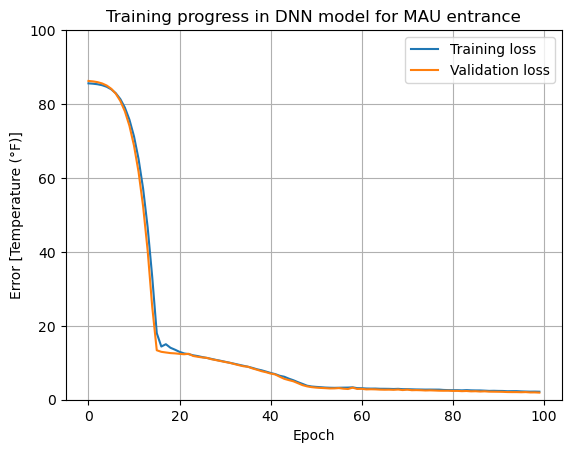

In [62]:
plot_loss(history_entrance)

In [63]:
def plot_loss(history_exit):
  plt.plot(history_exit.history['loss'], label='Training loss')
  plt.plot(history_exit.history['val_loss'], label='Validation loss')
  plt.ylim([0, 4])
  plt.xlim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Temperature (°F)]')
  plt.title('Training progress in DNN model for MAU exit')
  plt.legend()
  plt.grid(True)

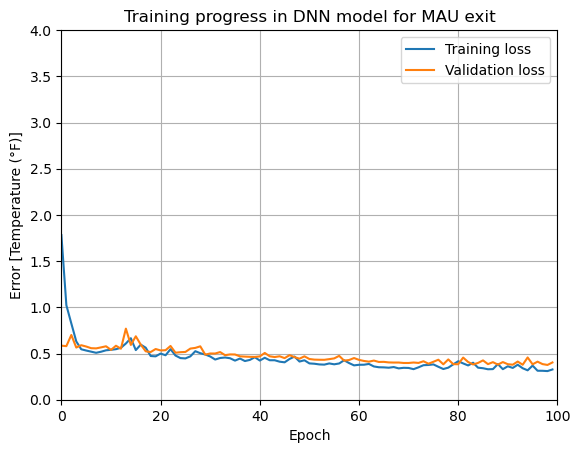

In [64]:

plot_loss(history_exit)

### Collect the results on the test set

#### MAU entrance

In [67]:
test_features_entrance = np.asarray(test_features_entrance).astype(np.float32)
test_features_entrance.shape

(68, 4)

In [68]:
test_results_entrance = {}
test_results_entrance['dnn_model'] = dnn_model.evaluate(test_features_entrance, test_labels_entrance, verbose=0)
test_results_entrance

{'dnn_model': 2.8926711082458496}

In [69]:
#original
ori_test_features_entrance = np.asarray(ori_test_features_entrance).astype(np.float32)
ori_test_features_entrance.shape

(3, 4)

In [70]:
ori_test_results_entrance = {}
ori_test_results_entrance['dnn_model'] = dnn_model.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=0)
ori_test_results_entrance

{'dnn_model': 3.8797504901885986}

#### MAU exit

In [72]:
test_features_exit = np.asarray(test_features_exit).astype(np.float32)

In [73]:
test_results_exit = {}
test_results_exit['dnn_model'] = dnn_model.evaluate(test_features_exit, test_labels_exit, verbose=0)
test_results_exit

{'dnn_model': 0.3804032802581787}

In [74]:
#original
ori_test_features_exit = np.asarray(ori_test_features_exit).astype(np.float32)
ori_test_features_exit.shape

(3, 4)

In [75]:
ori_test_results_exit = {}
ori_test_results_exit['dnn_model'] = dnn_model.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=0)
ori_test_results_exit

{'dnn_model': 0.2677103579044342}

## Performance

In [77]:
pd.DataFrame(test_results_entrance, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,2.892671


In [78]:
# original
pd.DataFrame(ori_test_results_entrance, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,3.87975


In [79]:
pd.DataFrame(test_results_exit, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,0.380403


In [80]:
#original
pd.DataFrame(ori_test_results_exit, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,0.26771


### Make predictions

In [82]:
test_predictions_entrance = dnn_model.predict(test_features_entrance).flatten()
test_predictions_entrance

3/3 [==============================] - 0s 515us/step


array([89.162, 83.98 , 77.864, 84.459, 86.081, 90.614, 73.121, 84.001,
       86.198, 92.047, 80.114, 92.093, 90.873, 84.333, 80.882, 92.117,
       90.421, 79.807, 84.5  , 90.446, 86.09 , 85.903, 71.503, 92.308,
       84.264, 89.109, 78.009, 86.009, 87.407, 85.808, 92.224, 90.597,
       85.95 , 86.137, 86.055, 73.172, 79.849, 83.923, 87.545, 85.933,
       81.076, 85.942, 90.871, 73.141, 79.822, 86.26 , 92.345, 86.147,
       87.853, 85.663, 90.526, 73.086, 86.125, 80.949, 90.78 , 90.546,
       90.702, 89.001, 77.846, 90.586, 73.233, 85.832, 83.986, 89.197,
       71.004, 92.076, 90.673, 73.105], dtype=float32)

In [83]:
# original
ori_test_predictions_entrance = dnn_model.predict(ori_test_features_entrance).flatten()
ori_test_predictions_entrance

1/1 [==============================] - 0s 6ms/step


array([73.119, 85.753, 85.993], dtype=float32)

In [84]:
test_predictions_exit = dnn_model.predict(test_features_exit).flatten()
test_predictions_exit

3/3 [==============================] - 0s 475us/step


array([75.713, 74.71 , 74.336, 74.043, 75.339, 75.306, 75.626, 74.495,
       75.495, 75.765, 74.798, 75.729, 75.417, 73.923, 75.87 , 75.784,
       75.316, 74.942, 74.136, 75.26 , 75.789, 75.223, 75.355, 75.741,
       74.547, 75.448, 74.279, 75.175, 75.519, 75.289, 75.846, 75.325,
       74.821, 75.662, 75.336, 75.489, 74.703, 74.59 , 75.569, 75.253,
       75.852, 74.707, 75.291, 75.618, 74.743, 75.665, 76.029, 74.69 ,
       75.388, 75.124, 74.856, 75.504, 75.533, 75.863, 75.098, 75.267,
       75.335, 75.695, 74.349, 74.934, 75.419, 74.655, 74.486, 75.648,
       75.35 , 75.665, 75.38 , 75.583], dtype=float32)

In [85]:
# original
ori_test_predictions_exit = dnn_model.predict(ori_test_features_exit).flatten()
ori_test_predictions_exit

1/1 [==============================] - 0s 6ms/step


array([75.502, 75.303, 75.328], dtype=float32)

In [86]:
error_entrance = test_predictions_entrance - test_labels_entrance
error_entrance

9     -0.487814
25    -1.679867
28    -0.706238
31    -4.529428
32    -4.113189
         ...   
315   -0.452544
323   -2.985567
325    3.666057
327    3.342821
328   -2.435248
Name: Temperature (Â°F), Length: 68, dtype: float64

In [87]:
# original
ori_error_entrance = ori_test_predictions_entrance - ori_test_labels_entrance
ori_error_entrance

5    -2.421454
12   -5.016979
15   -4.200821
Name: Temperature (°F), dtype: float64

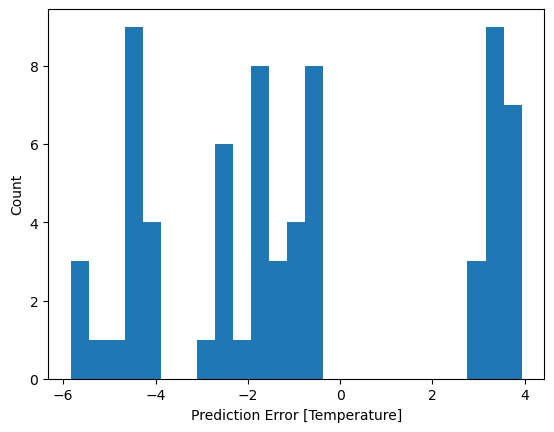

In [88]:
plt.hist(error_entrance, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

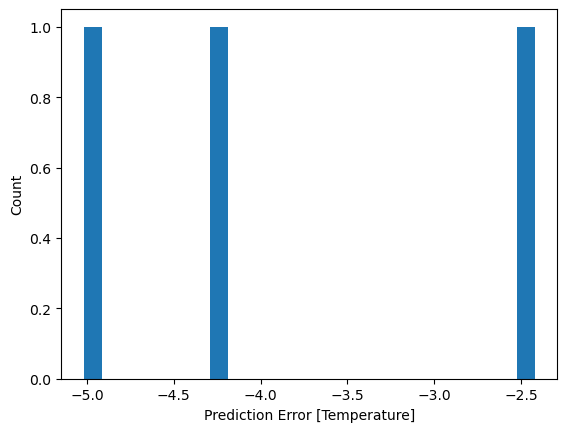

In [89]:
# original
plt.hist(ori_error_entrance, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

In [90]:
error_exit = test_predictions_exit - test_labels_exit
error_exit

9      0.638753
25    -0.183856
28    -0.180459
31    -1.030970
32     0.192638
         ...   
315    0.573820
323    0.312288
325    0.572810
327    0.342264
328    0.473450
Name: Temperature (Â°F), Length: 68, dtype: float64

In [91]:
# original
ori_error_exit = ori_test_predictions_exit - ori_test_labels_exit
ori_error_exit

5     0.391770
12    0.229230
15    0.182133
Name: Temperature (°F), dtype: float64

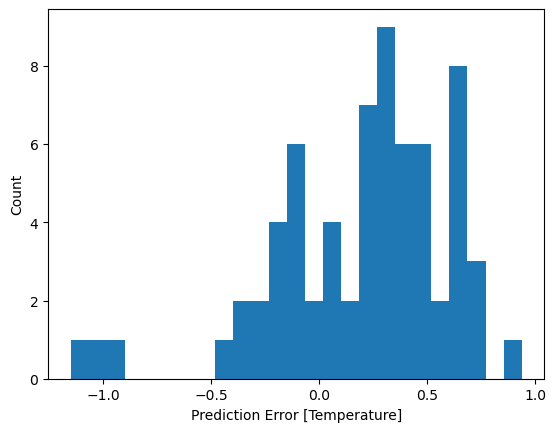

In [92]:
plt.hist(error_exit, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

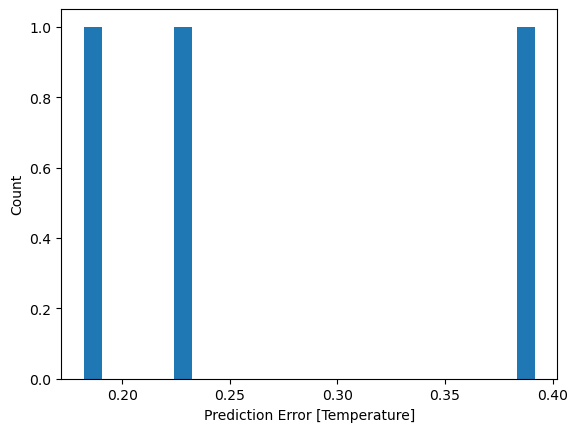

In [93]:
# original
plt.hist(ori_error_exit, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

#### Average error (AE)

AE: Provide a measure of bias

In [96]:
average_error_entrance = np.mean(error_entrance)
print("Average error:", average_error_entrance)

Average error: -0.9607871793859146


In [97]:
# original
ori_average_error_entrance = np.mean(ori_error_entrance)
print("Average error:", ori_average_error_entrance)

Average error: -3.879751302083335


In [98]:
average_error_exit = np.mean(error_exit)
print("Average error:", average_error_exit)

Average error: 0.1960481845631319


In [99]:
# original
ori_average_error_exit = np.mean(ori_error_exit)
print("Average error:", ori_average_error_exit)

Average error: 0.26771097819010475


#### Mean squared error (MSE) and mean absolute error (MAE)

MSE: Penalize significant errors more heavily \
MAE: Provide a measure of the average magnitude of errors

In [102]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels_entrance, test_predictions_entrance)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_entrance, test_predictions_entrance)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 10.570412913778632
Mean Absolute Error: 2.8926718283260575


In [103]:
# original
ori_mse = mean_squared_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mae = mean_absolute_error(ori_test_labels_entrance, ori_test_predictions_entrance)
print("Mean Squared Error:", ori_mse)
print("Mean Absolute Error:", ori_mae)

Mean Squared Error: 16.22680399670827
Mean Absolute Error: 3.879751302083335


In [104]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels_exit, test_predictions_exit)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_exit, test_predictions_exit)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.20891283522648949
Mean Absolute Error: 0.38040327094583093


In [105]:
# original
ori_mse = mean_squared_error(ori_test_labels_exit, ori_test_predictions_exit)
ori_mae = mean_absolute_error(ori_test_labels_exit, ori_test_predictions_exit)
print("Mean Squared Error:", ori_mse)
print("Mean Absolute Error:", ori_mae)

Mean Squared Error: 0.07973418891678537
Mean Absolute Error: 0.26771097819010475


In [106]:
import numpy as np

def mean_absolute_percentage_error(y_actual, y_pred):
    y_actual, y_pred = np.array(y_actual), np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape = mean_absolute_percentage_error(test_labels_entrance, test_predictions_entrance)
print(f'MAPE: {mape:.2f}%')

MAPE: 3.34%


In [107]:
# original
mape = mean_absolute_percentage_error(ori_test_labels_entrance, ori_test_predictions_entrance)
print(f'MAPE: {mape:.2f}%')

MAPE: 4.46%


In [108]:
mape = mean_absolute_percentage_error(test_labels_exit, test_predictions_exit)
print(f'MAPE: {mape:.2f}%')

MAPE: 0.51%


In [109]:
# original
mape = mean_absolute_percentage_error(ori_test_labels_exit, ori_test_predictions_exit)
print(f'MAPE: {mape:.2f}%')

MAPE: 0.36%


# Optuna

[I 2024-10-24 19:38:20,807] A new study created in memory with name: no-name-06697ccd-73dc-4680-b240-7d3b6fb6b20c
/var/folders/2z/b1lzf17n4z90pz80khfc42fw0000gp/T/ipykernel_4119/3630070542.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2024-10-24 19:38:23,224] Trial 0 finished with value: 20.393013954162598 and parameters: {'num_layers': 3, 'num_neurons_layer_0': 28, 'num_neurons_layer_1': 20, 'num_neurons_layer_2': 104, 'learning_rate': 0.0005998149387650946, 'activation': 'tanh'}. Best is trial 0 with value: 20.393013954162598.
/var/folders/2z/b1lzf17n4z90pz80khfc42fw0000gp/T/ipykernel_4119/3630070542.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

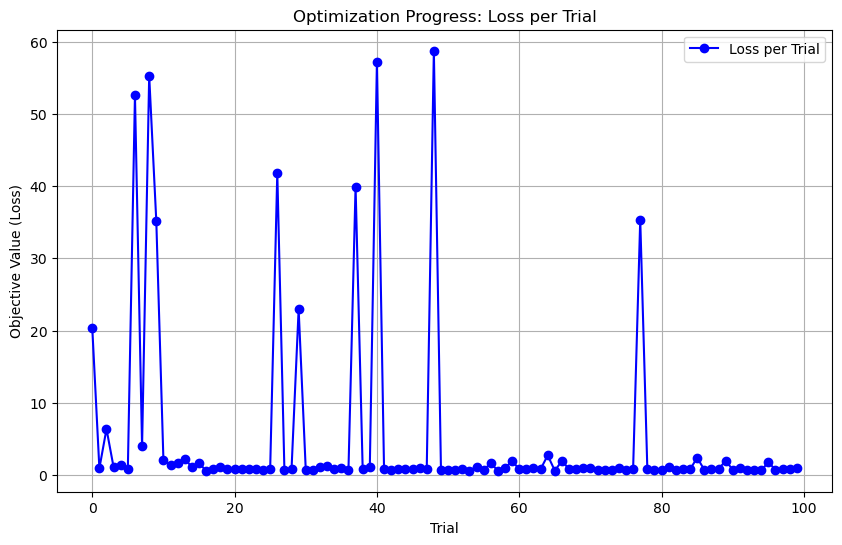

Best hyperparameters:  {'num_layers': 4, 'num_neurons_layer_0': 36, 'num_neurons_layer_1': 104, 'num_neurons_layer_2': 48, 'num_neurons_layer_3': 96, 'learning_rate': 0.002004988311475371, 'activation': 'relu'}
Best trial loss:  0.5570501685142517
Epoch 1/50
9/9 [==============================] - 0s 587us/step - loss: 69.3829
Epoch 2/50
9/9 [==============================] - 0s 522us/step - loss: 22.5302
Epoch 3/50
9/9 [==============================] - 0s 517us/step - loss: 14.3603
Epoch 4/50
9/9 [==============================] - 0s 544us/step - loss: 11.0119
Epoch 5/50
9/9 [==============================] - 0s 500us/step - loss: 9.1087
Epoch 6/50
9/9 [==============================] - 0s 490us/step - loss: 5.5413
Epoch 7/50
9/9 [==============================] - 0s 472us/step - loss: 3.8366
Epoch 8/50
9/9 [==============================] - 0s 447us/step - loss: 3.8065
Epoch 9/50
9/9 [==============================] - 0s 465us/step - loss: 2.6931
Epoch 10/50
9/9 [====================

In [ ]:
# import optuna
import optuna
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

trial_losses = []

# Function to create a model with the given hyperparameters
# Function to create a model with a specific number of neurons in each layer
def create_model(input_shape, neurons_per_layer, activation, learning_rate):
    model = tf.keras.Sequential()
    
    # Add the first layer with input shape
    model.add(layers.Dense(neurons_per_layer[0], activation=activation, input_shape=(input_shape,)))
    
    # Add subsequent layers with specified number of neurons
    for neurons in neurons_per_layer[1:]:
        model.add(layers.Dense(neurons, activation=activation))
    
    model.add(layers.Dense(1))  # Output layer
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss='mean_absolute_error')
    return model

# Objective function to optimize both entrance and exit models
def objective(trial):
    # Suggest number of layers
    num_layers = trial.suggest_int('num_layers', 1, 5)
    
    # Suggest a different number of neurons for each layer
    neurons_per_layer = []
    for i in range(num_layers):
        neurons = trial.suggest_int(f'num_neurons_layer_{i}', 16, 128, step=4)  # Each layer can have 16 to 128 neurons
        neurons_per_layer.append(neurons)
    
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])

    # Create models for both entrance and exit
    model_entrance = create_model(train_features_entrance.shape[1], neurons_per_layer, activation, learning_rate)
    model_exit = create_model(train_features_exit.shape[1], neurons_per_layer, activation, learning_rate)

    # Split data into training and validation for both entrance and exit
    x_train_entrance, x_val_entrance, y_train_entrance, y_val_entrance = train_test_split(train_features_entrance, train_labels_entrance, test_size=0.2, random_state=42)
    x_train_exit, x_val_exit, y_train_exit, y_val_exit = train_test_split(train_features_exit, train_labels_exit, test_size=0.2, random_state=42)

    # Train both models
    model_entrance.fit(x_train_entrance, y_train_entrance, validation_data=(x_val_entrance, y_val_entrance), 
                       epochs=100, batch_size=32, verbose=0)
    model_exit.fit(x_train_exit, y_train_exit, validation_data=(x_val_exit, y_val_exit), 
                   epochs=100, batch_size=32, verbose=0)

    # Evaluate both models on validation data
    val_loss_entrance = model_entrance.evaluate(x_val_entrance, y_val_entrance, verbose=0)
    val_loss_exit = model_exit.evaluate(x_val_exit, y_val_exit, verbose=0)

    # Combine the two objectives by returning a weighted sum
    combined_loss = 0.5 * val_loss_entrance + 0.5 * val_loss_exit
    trial_losses.append(combined_loss)  # Append the loss to the list
    
    return combined_loss

# Create a study and optimize both models simultaneously
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(trial_losses, label='Loss per Trial', marker='o', color='blue')
plt.title('Optimization Progress: Loss per Trial')
plt.xlabel('Trial')
plt.ylabel('Objective Value (Loss)')
plt.legend()
plt.grid(True)
plt.show()

# Print best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best trial loss: ", study.best_value)

# Build the final optimized models
def build_best_model(best_params, input_shape):
    num_layers = best_params['num_layers']
    
    # Reconstruct neurons per layer using the best parameters
    neurons_per_layer = [best_params[f'num_neurons_layer_{i}'] for i in range(num_layers)]
    activation = best_params['activation']
    learning_rate = best_params['learning_rate']

    model = create_model(input_shape, neurons_per_layer, activation, learning_rate)
    return model

# Create the final models using the best hyperparameters
final_model_entrance = build_best_model(study.best_params, train_features_entrance.shape[1])
final_model_exit = build_best_model(study.best_params, train_features_exit.shape[1])


# Train the final models on the full datasets
final_model_entrance.fit(train_features_entrance, train_labels_entrance, epochs=50, batch_size=32, verbose=1)
final_model_exit.fit(train_features_exit, train_labels_exit, epochs=50, batch_size=32, verbose=1)


3/3 [==============================] - 0s 2ms/step - loss: 1.1224
Test set loss for entrance: 1.1223833560943604
3/3 [==============================] - 0s 1ms/step - loss: 1.2042
Test set loss for exit: 1.204248309135437
1/1 [==============================] - 0s 11ms/step - loss: 1.0412
v2. Test set loss for entrance: 1.0412216186523438
1/1 [==============================] - 0s 9ms/step - loss: 0.5720
v2. Test set loss for exit: 0.5720087885856628
Test features Entrance: [[13.09   4.402 42.274  3.86 ]
 [14.32   4.37  39.863  3.699]
 [26.62   6.382 40.238  3.942]
 [ 7.97   2.692 38.022  2.277]
 [ 7.64   2.736 38.804  2.363]
 [20.63   6.577 45.579  5.597]
 [29.08   6.42  38.323  5.389]
 [14.32   4.34  39.86   3.699]
 [ 7.57   2.603 38.789  2.34 ]
 [20.05   6.657 46.226  5.752]
 [22.35   5.708 40.169  4.998]
 [20.05   6.616 46.23   5.817]
 [20.63   6.429 45.644  5.667]
 [ 7.97   2.68  37.952  2.306]
 [ 7.95   2.472 36.084  2.14 ]
 [20.05   6.622 46.246  5.795]
 [20.35   6.452 45.364  5.65

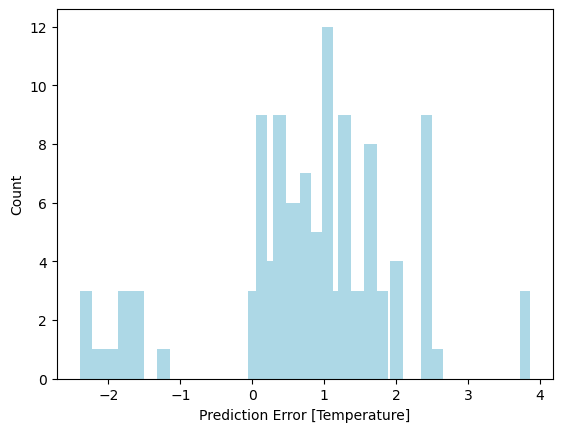

In [193]:
# Optionally, evaluate on a test set (if you have one)
test_loss_entrance = final_model_entrance.evaluate(test_features_entrance, test_labels_entrance, verbose=1)
print(f"Test set loss for entrance: {test_loss_entrance}")
test_loss_exit = final_model_exit.evaluate(test_features_exit, test_labels_exit, verbose=1)
print(f"Test set loss for exit: {test_loss_exit}")

ori_test_loss_entrance = final_model_entrance.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=1)
print(f"v2. Test set loss for entrance: {ori_test_loss_entrance}")
ori_test_loss_exit = final_model_exit.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=1)
print(f"v2. Test set loss for exit: {ori_test_loss_exit}")

#----------------------
test_features_entrance = np.asarray(test_features_entrance).astype(np.float32)
print("Test features Entrance:", test_features_entrance)
print()

ori_test_features_entrance = np.asarray(ori_test_features_entrance).astype(np.float32)
print("v2. Test features Entrance:", ori_test_features_entrance)
print()

#----------------------
test_results_entrance = {}
test_results_entrance['dnn_model'] = final_model_entrance.evaluate(test_features_entrance, test_labels_entrance, verbose=0)
print("Test result Entrance:", test_results_entrance)
print()

ori_test_results_entrance = {}
ori_test_results_entrance['dnn_model'] = final_model_entrance.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=0)
print("v2. Test result Entrance:", ori_test_results_entrance)
print()

#----------------------
test_features_exit = np.asarray(test_features_exit).astype(np.float32)
print("Test features Exit:", test_features_exit)
print()

ori_test_features_exit = np.asarray(ori_test_features_exit).astype(np.float32)
print("v2. Test features Exit:", ori_test_features_exit)

#----------------------
test_results_exit = {}
test_results_exit['dnn_model'] = final_model_exit.evaluate(test_features_exit, test_labels_exit, verbose=0)
print("Test result Exit:", test_results_exit)
print()

ori_test_results_exit = {}
ori_test_results_exit['dnn_model'] = final_model_exit.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=0)
print("v2. Test result Exit:", ori_test_results_exit)
print()

#----------------------
pd.DataFrame(test_results_entrance, index=['Mean absolute error [Temperature]']).T

pd.DataFrame(test_results_exit, index=['Mean absolute error [Temperature]']).T

pd.DataFrame(ori_test_results_entrance, index=['Mean absolute error [Temperature]']).T

pd.DataFrame(ori_test_results_exit, index=['Mean absolute error [Temperature]']).T

#----------------------
test_predictions_entrance = final_model_entrance.predict(test_features_entrance).flatten()
print("Test Predictions Entrance:", test_predictions_entrance)
print()

test_predictions_exit = final_model_exit.predict(test_features_exit).flatten()
print("Test Predictions Exit:", test_predictions_exit)
print()

ori_test_predictions_entrance = final_model_entrance.predict(ori_test_features_entrance).flatten()
print("v2. Test Predictions Entrance:", ori_test_predictions_entrance)
print()

ori_test_predictions_exit = final_model_exit.predict(ori_test_features_exit).flatten()
print("v2. Test Predictions Exit:", ori_test_predictions_exit)
print()

#----------------------
error_entrance = test_predictions_entrance - test_labels_entrance
print("Error entrance:", error_entrance)
print()

error_exit = test_predictions_entrance - test_labels_entrance
print("Error exit:", error_exit)
print()

ori_error_entrance = ori_test_predictions_entrance - ori_test_labels_entrance
print("v2. Error entrance:", ori_error_entrance)
print()

ori_error_exit = ori_test_predictions_entrance - ori_test_labels_entrance
print("v2. Error exit:", ori_error_exit)
print()

#----------------------
plt.hist(error_entrance, bins=25, color='lightblue')
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

error_exit = test_predictions_exit - test_labels_exit
error_exit

plt.hist(error_exit, bins=25, color='lightblue')
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

# average error
average_error_entrance = np.mean(error_entrance)
print("Average error for entrance:", average_error_entrance)
print()

average_error_exit = np.mean(error_exit)
print("Average error for exit:", average_error_exit)
print()

ori_average_error_entrance = np.mean(ori_error_entrance)
print("v2. Average error for entrance:", ori_average_error_entrance)
print()

ori_average_error_exit = np.mean(ori_error_exit)
print("v2. Average error for exit:", ori_average_error_exit)
print()

# mean squared error
from sklearn.metrics import mean_squared_error
mse_entrance = mean_squared_error(test_labels_entrance, test_predictions_entrance)
mse_exit = mean_squared_error(test_labels_exit, test_predictions_exit)
print("Mean Squared Error for entrance:", mse_entrance)
print("Mean Squared Error for exit:", mse_exit)
print()

from sklearn.metrics import mean_squared_error
ori_mse_entrance = mean_squared_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mse_exit = mean_squared_error(ori_test_labels_exit, ori_test_predictions_exit)
print("v2. Mean Squared Error for entrance:", ori_mse_entrance)
print("v2. Mean Squared Error for exit:", ori_mse_exit)
print()

# mean absolute error
from sklearn.metrics import mean_absolute_error
mae_entrance = mean_absolute_error(test_labels_entrance, test_predictions_entrance)
mae_exit = mean_absolute_error(test_labels_exit, test_predictions_exit)
print("Mean Absolute Error for entrance:", mae_entrance)
print("Mean Absolute Error for exit:", mae_exit)
print()


from sklearn.metrics import mean_absolute_error
ori_mae_entrance = mean_absolute_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mae_exit = mean_absolute_error(ori_test_labels_exit, ori_test_predictions_exit)
print("v2. Mean Absolute Error for entrance:", ori_mae_entrance)
print("v2. Mean Absolute Error for exit:", ori_mae_exit)
print()


import numpy as np

def mean_absolute_percentage_error(y_actual, y_pred):
    y_actual, y_pred = np.array(y_actual), np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape_entrance = mean_absolute_percentage_error(test_labels_entrance, test_predictions_entrance)
print(f'MAPE for entrance: {mape_entrance:.2f}%')

mape_exit = mean_absolute_percentage_error(test_labels_exit, test_predictions_exit)
print(f'MAPE for exit: {mape_exit:.2f}%')

ori_mape_entrance = mean_absolute_percentage_error(ori_test_labels_entrance, ori_test_predictions_entrance)
print(f'v2. MAPE for entrance: {ori_mape_entrance:.2f}%')

ori_mape_exit = mean_absolute_percentage_error(ori_test_labels_exit, ori_test_predictions_exit)
print(f'v2. MAPE for exit: {ori_mape_exit:.2f}%')



In [195]:
print("Trial Losses (Objective Values) as a Column:")
for i, loss in enumerate(trial_losses):
    print(f"{i + 1}|{loss}")

Trial Losses (Objective Values) as a Column:
1|20.393013954162598
2|0.8846242129802704
3|6.349931418895721
4|1.041165679693222
5|1.3741911053657532
6|0.7633539140224457
7|52.60276222229004
8|3.9390420019626617
9|55.32628059387207
10|35.13973140716553
11|2.012504458427429
12|1.2917988300323486
13|1.597553163766861
14|2.211782991886139
15|1.049449861049652
16|1.5876287817955017
17|0.5625100433826447
18|0.7661831974983215
19|1.0716294050216675
20|0.7539654672145844
21|0.7505942583084106
22|0.8040673434734344
23|0.7802556753158569
24|0.8131701946258545
25|0.7259791195392609
26|0.7979927659034729
27|41.85505485534668
28|0.6781105995178223
29|0.7329423427581787
30|22.95008945465088
31|0.6940211653709412
32|0.6004887670278549
33|1.1110619902610779
34|1.1572476625442505
35|0.7308538258075714
36|0.8779771327972412
37|0.6212256550788879
38|39.936201095581055
39|0.7414824962615967
40|1.0261983573436737
41|57.279184341430664
42|0.8126037418842316
43|0.7102407515048981
44|0.7987150847911835
45|0.75